In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_first_half = pd.read_csv('data_combined_with_dummies_weather_first_half.csv')
data_second_half = pd.read_csv('data_combined_with_dummies_weather_second_half.csv')
data = pd.concat([data_first_half, data_second_half], ignore_index=True)

In [3]:
# Linreg of avg_fare against using statsmodels
X = data[['avg_trip_distance']]
y = data['avg_fare']

X = sm.add_constant(X)  # Adds a constant term to the predictors
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avg_fare   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 2.919e+07
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:48:41   Log-Likelihood:            -1.5550e+07
No. Observations:             5411141   AIC:                         3.110e+07
Df Residuals:                 5411139   BIC:                         3.110e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1589      0.003   2151.246      0.000       7.152       7.165
avg_trip_distance     1.3143      0.000   5403.046      0.000       1.314       1.315
==============================================================================
Omnibus:                  3194229.523   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        488508533.455
Skew:                           1.836   Prob(JB):                         0.00
Kurtosis:                      49.403   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
data['log_distance'] = np.log(data['avg_trip_distance'] + 1)

In [5]:
# Intercept
intercept = model.params['const']

# slope
slope = model.params['avg_trip_distance']
intercept, slope

(np.float64(7.158938253477905), np.float64(1.3142997580296318))

In [6]:
data['base_price_airport'] = np.where(data['is_airport_origin'] == 1, 4.5,
                                      np.where(data['is_airport_destination'] == 1, 4, 0))

Dropping rows where the fare_per_dist == 0, creating M columns

In [7]:
data = data.loc[data['fare_per_dist'] != 0]

In [8]:
data['M'] = (data['avg_fare'] - intercept - data['base_price_airport']) / (slope * data['avg_trip_distance'])
data['M'].describe()

count    5.411140e+06
mean     9.957039e-01
std      3.444502e-01
min     -1.290974e+00
25%      8.229297e-01
50%      9.466696e-01
75%      1.107259e+00
max      2.756691e+02
Name: M, dtype: float64

In [9]:
(data['fare_per_dist'] == 0).sum(), (data['avg_trip_distance'] == 0).sum()

(np.int64(0), np.int64(0))

<Axes: xlabel='M', ylabel='Count'>

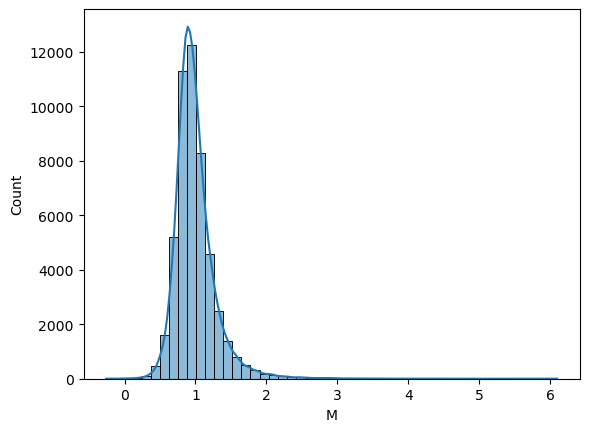

In [11]:
data['M_capped'] = np.where(data['M'] > 5, 5, data['M'])
sns.histplot(data['M'].sample(50000), bins=50, kde=True)